# Model Training

### Import Libraries and Import Data

In [6]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor

import warnings

In [7]:
from xgboost import XGBRegressor

In [8]:
df = pd.read_csv("/Users/luis/Documents/Programming/dev/0760 Complete MLOps Bootcamp With 10 Plus End To End ML Projects Krish Naik/venv_0760_Complete_MLOps_Bootcamp_Krish_Naik_312_01/0760_Course/Section 20 End To End DS Project implementation With Mulitple AWS, Azure Deployment/0760_20_01_ML_Students_Performance/notebook/data/students_performance_0760.csv")

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

## Data Cleaning


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.isna().sum()
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Multiple ways of doing this.
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score']


01) 
* Independent features
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

* Dependent Feature
['total_score']

* PreProcessing Steps
Preprocess and get the total score of the following features:
['math_score', 'reading_score', 'writing_score']

02) 
* Independent features
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

* Dependent Feature
['average_score']

* PreProcessing Steps
Preprocess and get the average score of the following features:
['math_score', 'reading_score', 'writing_score']


03) A)
* Independent features
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course',  'reading_score', 'writing_score']

* Dependent Feature
['math_score']

03) B)
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course',  'math_score', 'writing_score']

* Dependent Feature
['reading_score']

03) C)
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course',  'math_score', 'reading_score']

* Dependent Feature
['writing_score']



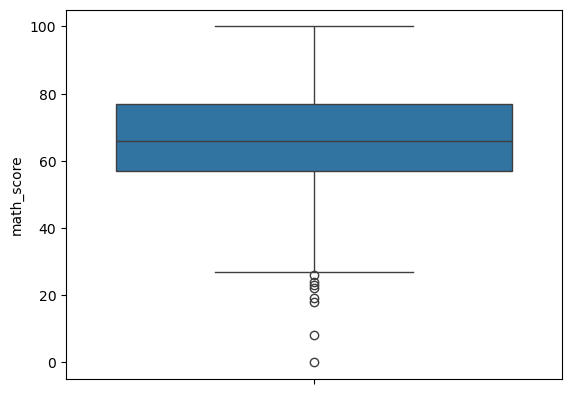

In [13]:
sns.boxplot(data=df['math_score'])
plt.show()

In [14]:
print(np.quantile(a=df['math_score'], q=[0.0, 0.25, 0.5, 0.75, 1.0]))
QR_25 = np.quantile(a=df['math_score'], q=[0.25])
QR_75 = np.quantile(a=df['math_score'], q=[0.75])
IQR = QR_75 - QR_25
IQR

[  0.  57.  66.  77. 100.]


array([20.])

In [15]:
df02 = df.copy()
df02.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
df02.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [18]:
## X and y
X = df.drop(columns=['math_score'], axis=1)
#X
X.head()
y = df['math_score']
#y

In [19]:
X.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'reading_score', 'writing_score'],
      dtype='object')

In [22]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental_level_of_education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:      ['none' 'completed']


## Pipeline


## Feature Transformation

* One Hot Encoding for columns that don't have many categorical features

* For columns that have many categorical features can use Target Guided Ordinal Encoding

In [24]:
## Use OHE for categorical features and Standard Scaler for numerical
## Create Column Transformer with 3 types of transformers
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

## Divide by Numerical and Categorical Features
num_features = X.select_dtypes(exclude='object').columns
#num_features
cat_features = X.select_dtypes(include='object').columns
#cat_features
num_features, cat_features


(Index(['reading_score', 'writing_score'], dtype='object'),
 Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
        'test_preparation_course'],
       dtype='object'))

df.head(2)

X.head(2)

y[0:2]

In [29]:
## Column Transformer will combine the Standard Scaler and One Hot Encoder together
## Numerical Features - Standard Scaler
## Categorical Features - One Hot Encoding

## Initialized scalers
ohe_transformer = OneHotEncoder()
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", ohe_transformer, cat_features),
        ("StandardScaler", numeric_transformer,num_features),
    ]
)

In [30]:
X_scaled = preprocessor.fit_transform(X)
X_scaled.shape

(1000, 19)

In [56]:
print(f"{df.shape}")## X (independent) and y (dependent) combined, so 8
print(f"{X.shape}")## Independent features
print(f"{X_scaled.shape}")
## From being 7 columns it is now 19 columns

(1000, 8)
(1000, 7)
(1000, 19)


In [57]:
X_scaled[:1].shape, X_scaled[:1]

((1, 19),
 array([[1.        , 0.        , 0.        , 1.        , 0.        ,
         0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 1.        ,
         0.        , 1.        , 0.19399858, 0.39149181]]))

In [58]:
### Train and Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [59]:
type(X_train)

numpy.ndarray

In [ ]:
y_train.shape[0]
X_train.shape, X.shape, df.shape
X.shape[1],

NameError: name 'y_true' is not defined

1000

In [81]:
## Create function to return metrics
def evaluate_model(y_true, y_pred):
    """
    Performs model evaluation for getting different metrics
    
    Args
      y_true
      y_pred

    Returns
      mean_absolute_error
      rmse
      r2_squared
    
    
    evaluate_model(y_true=, y_pred=)
    
    Returns in this order:
    mean_absolute_error, rmse, r2_squared
    """
    mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
    #mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    rmse = np.sqrt(mean_squared_error(y_true=y_true, y_pred=y_pred))
    r2_squared = r2_score(y_true=y_true, y_pred=y_pred)
    return mae, rmse, r2_squared

In [84]:
## Create list of models to train
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
}
model_list = []
r2_list = []
mae_list = []
rmse_list = []
adjr2_list= []

for i in range(len(list(models))):
    #print(i)## 0
    model = list(models.values())[i]
    #print(model)## LinearRegression()
    #print("")
    model.fit(X_train, y_train)

    ## Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ## Evaluate Train and Test Dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_true=y_train, y_pred=y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_true=y_test, y_pred=y_test_pred)

    adj_r2_squared_train = 1-(1-model_train_r2)*(y_train.shape[0]-1)/(y_train.shape[0]-X.shape[1]-1)
    adj_r2_squared_test = 1-(1-model_test_r2)*(y_test.shape[0]-1)/(y_test.shape[0]-X.shape[1]-1)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    

    print('Model performance - For Training Set')
    print("- RMSE: {:.4f}".format(model_train_rmse))
    print("- MAE: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print("- Adj R2 Score: {:.4f}".format(adj_r2_squared_train))


    print('----------------------------------')
    
    print('Model performance - For Test set')
    print("- RMSE: {:.4f}".format(model_test_rmse))
    print("- MAE: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    print("- Adj R2 Score: {:.4f}".format(adj_r2_squared_test))

    r2_list.append(model_test_r2)
    rmse_list.append(model_test_rmse)
    mae_list.append(model_test_mae)
    adjr2_list.append(adj_r2_squared_test)
    
    
    print('='*35)
    print('\n')



Linear Regression
Model performance - For Training Set
- RMSE: 5.3231
- MAE: 4.2667
- R2 Score: 0.8743
- Adj R2 Score: 0.8732
----------------------------------
Model performance - For Test set
- RMSE: 5.3940
- MAE: 4.2148
- R2 Score: 0.8804
- Adj R2 Score: 0.8761


Lasso
Model performance - For Training Set
- RMSE: 6.5938
- MAE: 5.2063
- R2 Score: 0.8071
- Adj R2 Score: 0.8054
----------------------------------
Model performance - For Test set
- RMSE: 6.5197
- MAE: 5.1579
- R2 Score: 0.8253
- Adj R2 Score: 0.8190


Ridge
Model performance - For Training Set
- RMSE: 5.3233
- MAE: 4.2650
- R2 Score: 0.8743
- Adj R2 Score: 0.8732
----------------------------------
Model performance - For Test set
- RMSE: 5.3904
- MAE: 4.2111
- R2 Score: 0.8806
- Adj R2 Score: 0.8762


K-Neighbors Regressor
Model performance - For Training Set
- RMSE: 5.7079
- MAE: 4.5168
- R2 Score: 0.8555
- Adj R2 Score: 0.8542
----------------------------------
Model performance - For Test set
- RMSE: 7.2530
- MAE: 5.6

Note on Adjusted R2


you can calculate the adjusted R2 from R2 with a simple formula given here.

Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)

Where n is the sample size and p is the number of independent variables.

Adjusted R2 requires number of independent variables as well. That's why it will not be calculated using this function.




Looks like the wikipedia has been revised over the course of time in regards to Adjusted R2 formula. To match the current state of the wikipedia link here this would be the appropriate formula:

Adj r2 = 1-(1-R2)*(n-1)/(n-p) **notice last part is (n-p) instead of (n-p-1)

where:

n = count of rows in your dataset used for train or test
p = count of independent variables


In [87]:

#pd.DataFrame(list(zip(model_list, r2_list, rmse_list, mae_list)), columns = ['Model_Name','R2_Score', 'RMSE_Score', 'MAE_Score',]).sort_values(by=['R2_Score'], ascending=False)

pd.DataFrame(list(zip(model_list, r2_list,adjr2_list, rmse_list, mae_list)), columns = ['Model_Name','R2_Score','Adj_R2', 'RMSE_Score', 'MAE_Score',]).sort_values(by=['R2_Score'], ascending=False)

,Model_Name,R2_Score,Adj_R2,RMSE_Score,MAE_Score
2,Ridge,0.880593,0.876240,5.390387,4.211101
0,Linear Regression,0.880433,0.876074,5.393994,4.214763
5,Random Forest Regressor,0.853970,0.848646,5.961097,4.609058
8,AdaBoost Regressor,0.853381,0.848036,5.973102,4.627111
7,CatBoosting Regressor,0.851632,0.846223,6.008632,4.612532
6,XGBRegressor,0.827797,0.821518,6.473307,5.057731
1,Lasso,0.825320,0.818951,6.519695,5.157882
3,K-Neighbors Regressor,0.783813,0.775931,7.253041,5.621000
4,Decision Tree,0.752567,0.743546,7.759510,6.190000


In [89]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Model_Name','R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model_Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.853970
8,AdaBoost Regressor,0.853381
7,CatBoosting Regressor,0.851632
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.752567


There is hardly any difference between Ridge and Linear Regression

Will choose to train the model with Linear Regression

## Linear Regression

In [90]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
r2_score_test = r2_score(y_true=y_test, y_pred=y_pred)
r2_score_test_perc = r2_score_test*100
#print("Accuracy of the model is %.2f" %r2_score_test_perc)
print(f"Accuracy of the model is {r2_score_test_perc:.2f}")


Accuracy of the model is 88.04


## plot

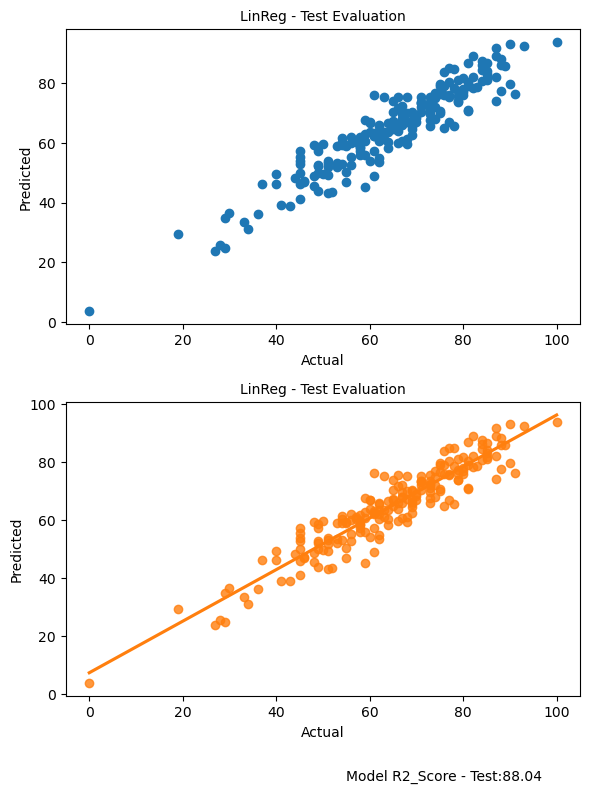

In [91]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6,8))
axes[0].scatter(x=y_test, y=y_pred)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted", fontsize=10)
axes[0].set_title("LinReg - Test Evaluation", fontsize=10)
#plt.text(x=55, y=-30, s=f"Model R2_Score - Test:{r2_score_test_perc:.2f}")

sns.regplot(x=y_test, y=y_pred, ci=None, color='tab:orange',scatter=True, ax=axes[1],)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted", fontsize=10)
axes[1].set_title("LinReg - Test Evaluation", fontsize=10)
plt.text(x=55, y=-30, s=f"Model R2_Score - Test:{r2_score_test_perc:.2f}")

plt.tight_layout()
plt.show()

## Difference between Actual vs Predicted Values

In [92]:
pred_df = pd.DataFrame({'Actual Value': y_test,'Predicted Value': y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287


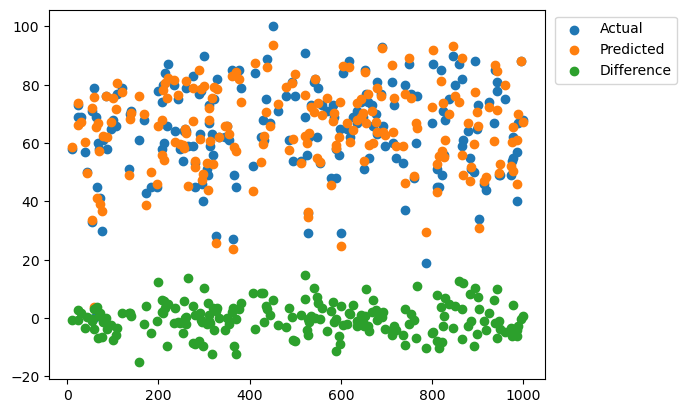

In [93]:
plt.scatter(pred_df['Actual Value'].index, pred_df['Actual Value'].values, label='Actual')
plt.scatter(pred_df['Predicted Value'].index, pred_df['Predicted Value'].values, label='Predicted')
plt.scatter(pred_df['Difference'].index, pred_df['Difference'].values, label='Difference')
plt.legend(loc=(1.02,0.8))
plt.show()

In [94]:
pred_df['Difference'].min(),pred_df['Difference'].max()

#plt.scatter(pred_df['Difference'].index, pred_df['Difference'].values, label='Difference')
#plt.legend(loc=(1.02,0.8))
#plt.show()

(-15.255711098581287, 14.612030295292342)